In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Correlation ##

In [2]:
hybrid = Table.read_table('hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


In [3]:
hybrid.sort('msrp', descending=True)

vehicle,year,msrp,acceleration,mpg,class
Lexus LS600h/hL,2007,118544,17.54,21,Midsize
ActiveHybrid 7,2010,104300,20.41,22.11,Large
ActiveHybrid 7i,2011,102606,18.18,20,Midsize
ActiveHybrid X6,2009,97237.9,17.96,18.82,SUV
S400 Long,2009,96208.9,13.89,26.34,Large
Panamera S,2013,96150,18.52,25,Large
Panamera S,2012,95283.9,17.54,25,Large
S400,2013,92350,13.89,21,Large
S400,2010,88212.8,12.99,21,Large
ActiveHybrid 7L,2013,84300,18.18,25,Large


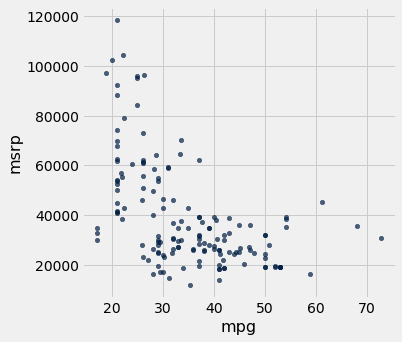

In [4]:
hybrid.scatter('mpg', 'msrp')

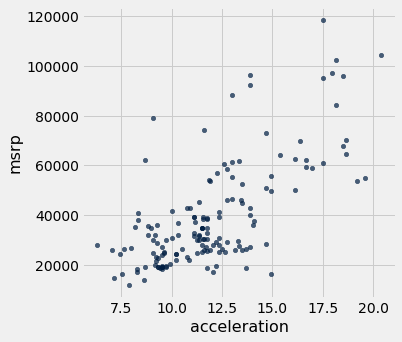

In [5]:
hybrid.scatter('acceleration', 'msrp')

In [6]:
suv = hybrid.where('class', 'SUV')
suv
suv.num_rows

39

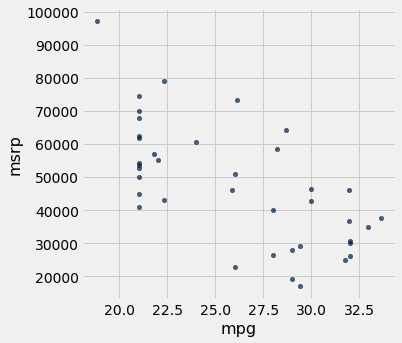

In [7]:
suv.scatter('mpg', 'msrp')

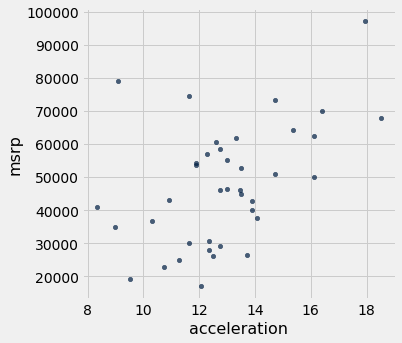

In [8]:
suv.scatter('acceleration', 'msrp')

In [9]:
def standard_units(arr):
    "Convert any array of numbers to standard units."
    return (arr - np.mean(arr))/np.std(arr)

In [10]:
suv = suv.with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp')),
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
)
suv

vehicle,year,msrp,acceleration,mpg,class,mpg (standard units),msrp (standard units),acceleration (standard units)
Escape,2004,36676.1,10.32,31.99,SUV,1.31784,-0.60884,-1.16157
Lexus RX400h,2005,58521.1,12.76,28.23,SUV,0.48955,0.605991,-0.0718039
Highlander,2005,29186.2,12.76,29.4,SUV,0.747288,-1.02536,-0.0718039
Escape 2WD,2005,19322.6,9.52,29,SUV,0.659172,-1.57389,-1.51888
Mercury Mariner,2006,34772.4,8.98,32.93,SUV,1.52491,-0.714707,-1.76005
Chevrolet Tahoe,2007,42924.3,10.91,22.35,SUV,-0.805749,-0.261367,-0.898064
Kluger,2007,46229.5,12.76,25.87,SUV,-0.0303321,-0.0775641,-0.0718039
Tribute,2007,24823.8,11.28,31.75,SUV,1.26497,-1.26796,-0.732812
GMC Yukon,2007,57094.8,12.28,21.78,SUV,-0.931314,0.526671,-0.286185
Vue,2007,22938.3,10.75,26,SUV,-0.00169453,-1.37281,-0.969524


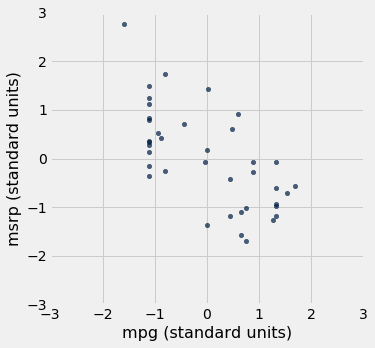

In [11]:
suv.scatter('mpg (standard units)', 'msrp (standard units)')
plots.xlim(-3, 3)
plots.ylim(-3, 3);

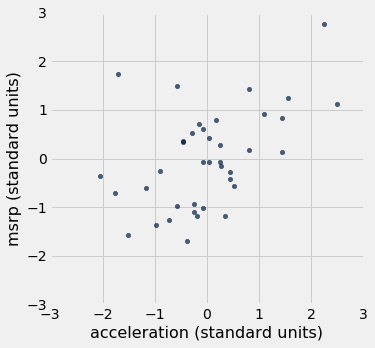

In [12]:
suv.scatter('acceleration (standard units)', 'msrp (standard units)')
plots.xlim(-3, 3)
plots.ylim(-3, 3);

In [13]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


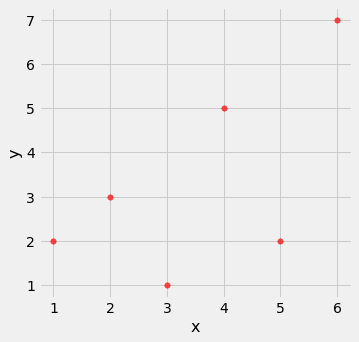

In [14]:
t.scatter('x', 'y', s=30, color='red')

In [15]:
t = t.with_column(
    'x (std units)', standard_units(x),
    'y (std units)', standard_units(y))
t

x,y,x (std units),y (std units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


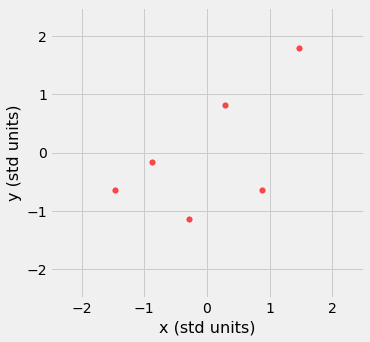

In [16]:
t.scatter('x (std units)', 'y (std units)', s=30, color='red')
plots.xlim(-2.5, 2.5)
plots.ylim(-2.5, 2.5);

In [17]:
x_standard = t.column('x (std units)')
y_standard = t.column('y (std units)')
t = t.with_column(
    'product in standard units', x_standard * y_standard)
t

x,y,x (std units),y (std units),product in standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [18]:
r = np.mean(t.column('product in standard units'))
r

0.6174163971897709

In [19]:
def correlation(t, label_x, label_y):
    x_standard = standard_units(t.column(label_x))
    y_standard = standard_units(t.column(label_y))
    return np.mean(x_standard * y_standard)
correlation(t, 'x', 'y')

0.6174163971897709

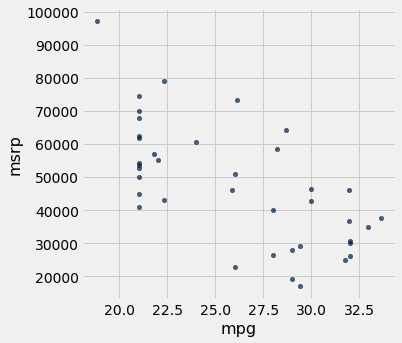

In [20]:
suv.scatter('mpg', 'msrp')

In [21]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

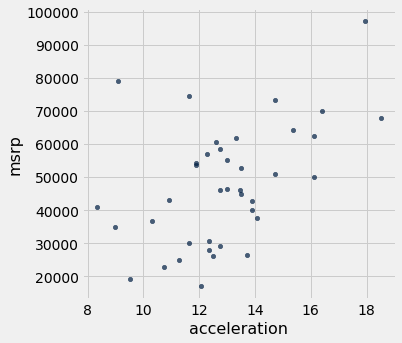

In [22]:
suv.scatter('acceleration', 'msrp')

In [23]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

In [24]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

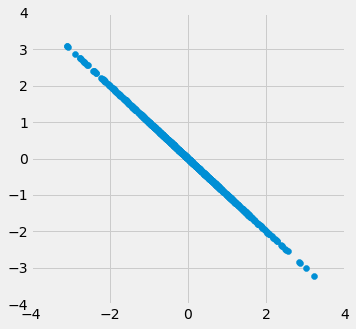

In [25]:
r_scatter(-1.0)

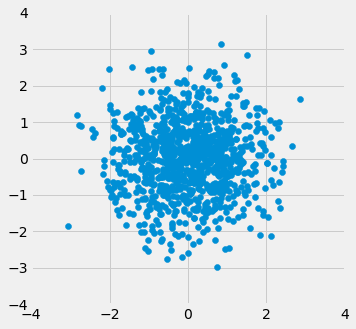

In [26]:
r_scatter(0)

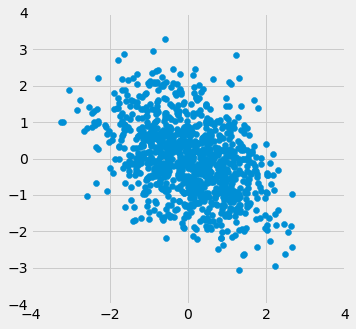

In [28]:
r_scatter(-0.4)

In [29]:
correlation(t, 'x', 'y')

0.6174163971897709

In [30]:
correlation(t, 'y', 'x')

0.6174163971897709

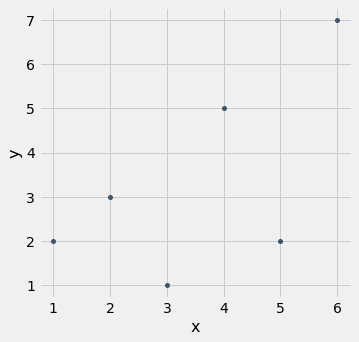

In [31]:
t.scatter('x', 'y')

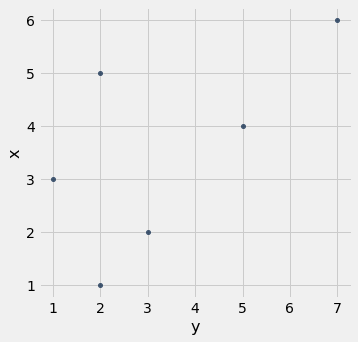

In [32]:
t.scatter('y', 'x')

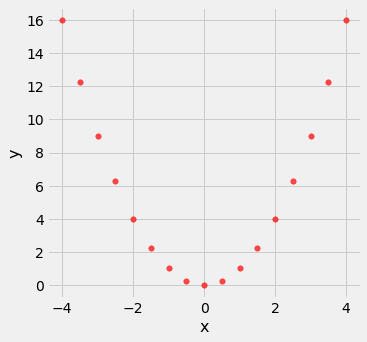

In [33]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [34]:
correlation(nonlinear, 'x', 'y')

0.0

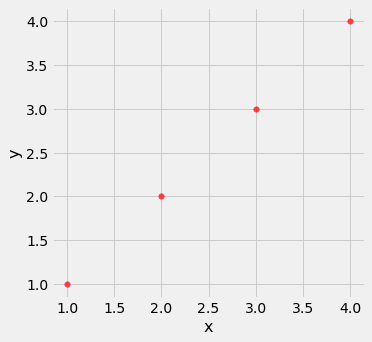

In [35]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [36]:
correlation(line, 'x', 'y')

1.0

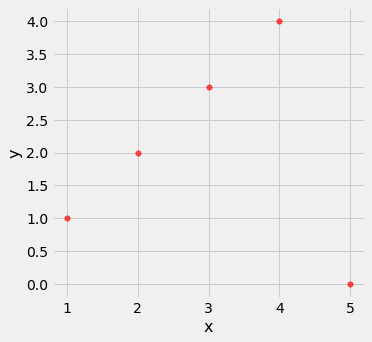

In [37]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [38]:
correlation(outlier, 'x', 'y')

0.0

In [46]:
by_state = Table.read_table('election2016_state.csv')
by_state

State,Median Income,Percent voting for Clinton
Alabama,47221,0.343579
Alaska,75723,0.365509
Arizona,57100,0.45126
Arkansas,45907,0.336519
California,66637,0.617264
Colorado,70566,0.481565
Connecticut,75923,0.545663
Delaware,58046,0.53086
Florida,51176,0.478233
Georgia,53527,0.4564


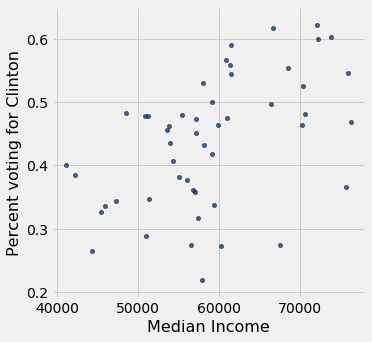

In [47]:
by_state.scatter('Median Income', 'Percent voting for Clinton')

In [48]:
party = Table.read_table('party_affiliation2016.csv')
party

Income,Republican%,Democrat%,No leaning%
"Below 30,000",32,60,8
"30,000 to 39,999",47,46,7
"50,000 to 74,999",49,44,6
"75,000 to 99,999",48,44,8
"40,000 to 49,999",47,46,7
"100,000 to 149,999",51,45,4
"Above 150,000",46,48,6


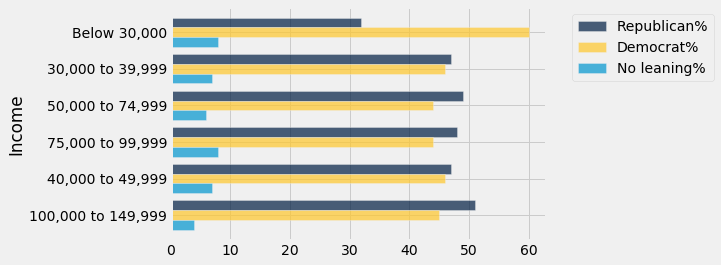

In [49]:
party.exclude(6).barh('Income')

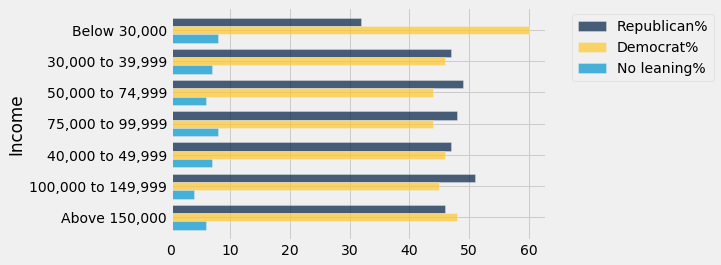

In [50]:
party.barh('Income')

In [51]:
by_district = Table.read_table('election2016_district.csv')
by_district

District,Median Income,Percent voting for Clinton
"Congressional District (at Large), Alaska",76440,37.6
"Congressional District (at Large), Delaware",61757,53.4
"Congressional District (at Large), Montana",50027,35.9
"Congressional District (at Large), North Dakota",60656,27.7
"Congressional District (at Large), South Dakota",54467,31.7
"Congressional District (at Large), Vermont",57677,56.7
"Congressional District (at Large), Wyoming",59882,22.5
"Congressional District 1, Alabama",47083,34.1
"Congressional District 1, Arizona",50537,46.6
"Congressional District 1, Arkansas",40492,30.2


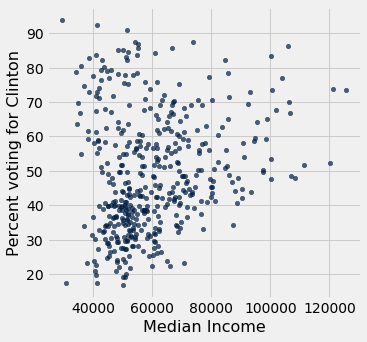

In [52]:
by_district.scatter('Median Income', 'Percent voting for Clinton')

In [53]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


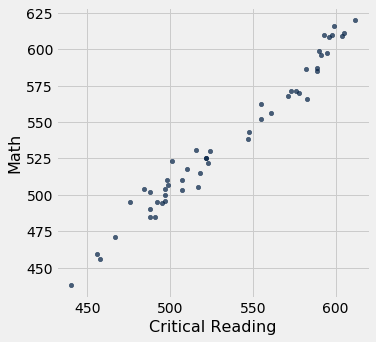

In [54]:
sat2014.scatter('Critical Reading', 'Math')

In [55]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434